## Cellular Automata Rickert Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class MultiLaneSimulation:
    def __init__(self, length = 100, density = 0.1, maxv = 5, pslow = 0.5, nlanes = 2):
        self.length = length
        self.density = density
        self.maxv = maxv
        self.pslow = pslow
        self.nlanes = nlanes
        
        self.state = [maxv if i <= length*nlanes*density else -1 for i in range(length*nlanes)]
        np.random.shuffle(self.state)
        self.state = np.reshape(self.state,(nlanes, length))
        
    def display(self):
        print('\n'.join(''.join('.' if x == -1 else str(x) for x in row) for row in self.state) + "\n")
        
    def switch(self):
        copy = np.copy(self.state)
        
        for j in range(len(self.state)):
            for i, v in enumerate(self.state[j]):
                if v >= 0:
                    l = 1
                    
                    # Check distance in front. No need to switch if there is space in currently lane
                    while copy[j, (i + l) % self.length] == -1 and l <= v + 1: l += 1
                    if l > v+1: 
                        #print("j",j,"i", i,"v", v,"l", l)
                        continue
                        
                    # Check if left lane, then right lane is suitable for a switch. 
                    for lane in (j-1, j+1):
                        # Lane not suitable if it doesn't exist,
                        if lane < 0 or lane + 1 > self.nlanes: continue
                        
                        # lane is not suitable if not enough distance in front or at the back
                        d_front, d_back = 0, 0 
                        while copy[lane, (i + d_front) % self.length] == -1 and d_front <= v + 1: d_front += 1
                        while copy[lane, (i - d_back) % self.length] == -1 and d_back <= self.maxv: d_back += 1
                        if d_front < v or d_back < self.maxv: continue

                        #print(f"switching vehicle {v} at {(j,i)} to {(lane,i)}")
                        #self.state[j, i], self.state[lane, i] = -1, v
                        copy[j, i], copy[lane, i] = -1, v
                        break

        self.state = copy
    
    def calculate(self):
        for j in range(len(self.state)):
            for i, v in enumerate(self.state[j]):
                if v >= 0:
                    d = 1
                    while self.state[j, (i + d) % self.length] == -1: d += 1

                    self.state[j, i] = min(self.state[j, i] + 1, self.maxv) if d > v + 1 else (d - 1)

                    if (self.state[j, i] > 0 and np.random.random() < self.pslow): self.state[j, i] -= 1
                        
      
    def update(self):
        newstate = -np.ones((self.nlanes, self.length), int)
        
        flow = 0
        
        for j in range(self.nlanes):
            for i, v in enumerate(self.state[j]):
                if i + v > self.length:
                    flow += 1
                if v >= 0:
                    newstate[j,(i + v) % self.length] = v
                    
        self.state = newstate
        return flow/self.nlanes
    
    def run(self, n, verbose = False, switching = True):
        flows = []
        for i in range(n):
            if verbose: self.display()
            if switching: self.switch()
            self.calculate()
            flows.append(self.update())

        return np.mean(flows)
    
    def q1to6(self, verbose = False):
        if verbose:
            print("before switching"), q.display(); 
            for i in range(2):
                print("switch"), q.switch(); q.display(); 
                print("calculate"), q.calculate(); q.display(); 
                print("update"), q.update(); q.display(); 
            print("switch")
        else:
            for i in range(2): q.display(); q.switch(); q.calculate(); q.update();
            q.display()

In [4]:
np.random.seed(13)
multi = MultiLaneSimulation(length = 80, density = 0.4, pslow = 0.5)
multi.run(20, verbose = True, switching = True, middle = True)

TypeError: run() got an unexpected keyword argument 'middle'

In [5]:
np.random.seed(13)
multi = MultiLaneSimulation(length = 60, density = 0.4, pslow = 0.5)
multi.run(10, verbose = True, switching = True)

.5..55..55....55.5..5.5.......5..555.55...5.......555.5.5.5.
.5.5..5....5555.5...5.55..5.5555..5.5555.......5.5...5..5.5.

2..20..20....40.1.1.0.....4....1.00.10..2.....4...00.1.10...
2.1..2....4000.1...30.0.1.0.000.1..1000....4...0...2...20...

..200..00....00..1.1.1.......3..10.100....2.....2.0.1.100...
0...2..2..0000...2.00.0..10.00.1..2000.1......30.....2.00...

..00.1.0.1...00...1.1.1.....0..20.100.1.....2...0..1..00.1..
.1....2.1.000.1..0.0.1.1.0.1..1..20000...2....00....0.10.1..

..0.1.10...2.00...0..1..2...0..0.1000..1......2..1..1.00..1.
...2..0..1000...2.1.10.0..1.1...200000......3.0.1....100...2

2.0..100....10.1..0...1...2.0...10000...1......1..1..10.1...
..3.1.0..000.1..0..100.0...1..2.000000.......1.1..2..000....

...1.00.1...00..1..1...1..0..1..00000....1....1..2..200...2.
0..10..1.000...20..000..1....20.000000...........2.1.00.1...

.3..10.1.1..0.1...2.1...1.0...1.00000.....1.....2.1.00.1....
.1.00...1000...0.1.00.1...2..00.000000...........0.0.0.1.1..

..1.0.10..1..1..

0.15

In [6]:
np.random.seed(13)
multi = MultiLaneSimulation(length = 80, density = 0.1, pslow = 0.5)
multi.run(10, verbose = True, switching = True)

.......................5.5......5..........5...............5.....5...5..........
............5...........55........5.......5....5..............5.5...5........5..

........................1....4......4..........4................5...3.....5.....
.4..............4.......0.....5........5.....3.....4..........0....3.....5......

.........................1........5.....4..........4...............3...3......4.
......5.............4....1.........5........5....4.....4......0.......3.......5.

...5....................4.1............5.....5.........4...................4....
..4........5..............1............4........4.....5.....5..1....1.....4.....

........5................1..2...............5.....5.......3......5.............4
.......5........5...........2...............5.......4......5....1....1.........5

...4.........5............1....3................4.....4......3........5.........
....5......4........4..........3................4........5....3...2....2........

.......4.........4....

0.4

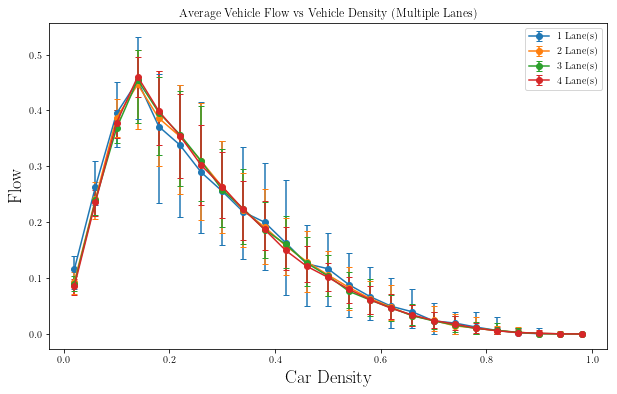

In [11]:
fig, ax = plt.subplots(figsize = (10,6))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

densities = np.arange(0.02, 1, 0.04).repeat(100)

for i in range(1,5):
    multiflow = [MultiLaneSimulation(100, d, 5, 0.2, nlanes = i).run(n=100) for d in densities]
             
    plt.errorbar(np.arange(0.02, 1, 0.04),  np.mean(np.reshape(multiflow, (-1,100)), axis = 1),
             yerr = np.abs(np.mean(np.reshape(multiflow, (-1,100)), axis = 1) - 
                           np.percentile(np.reshape(multiflow, (-1,100)), [2.5,97.5], axis = 1)),
            fmt = '-o', capsize = 3, label = f"{i} Lane(s)")

plt.xlabel(r'Car Density', fontsize = 18)
plt.ylabel(r'Flow', fontsize = 18)

plt.legend(loc='upper right');
plt.title("Average Vehicle Flow vs Vehicle Density (Multiple Lanes)")
plt.savefig("Traffic Simulation/multilanemultiflow.png", bbox_inches='tight')
plt.show()

In [61]:
class MultiLaneMiddleSimulation(MultiLaneSimulation):
     def calculate(self):
        for j in range(len(self.state)):
            for i, v in enumerate(self.state[j]):
                if v >= 0:
                    d_front, d_back = 1,1
                    
                    while self.state[j, (i + d_front) % self.length] == -1: d_front += 1
                    while self.state[j, (i - d_back) % self.length] == -1: d_back += 1

                    self.state[j, i] = min(self.state[j, i] + 1, self.maxv, d_front - 1) if (d_front + 1 > d_back) else min(max(v - 1, 0), d_front - 1)

                    if (self.state[j, i] > 0 and np.random.random() < self.pslow): self.state[j, i] -= 1
                        


In [59]:
np.random.seed(13)
multinorm = MultiLaneSimulation(length = 60, density = 0.4, pslow = 0.5)
multinorm.run(10, verbose = True, switching = True)

.5..55..55....55.5..5.5.......5..555.55...5.......555.5.5.5.
.5.5..5....5555.5...5.55..5.5555..5.5555.......5.5...5..5.5.

2..20..20....40.1.1.0.....4....1.00.10..2.....4...00.1.10...
2.1..2....4000.1...30.0.1.0.000.1..1000....4...0...2...20...

..200..00....00..1.1.1.......3..10.100....2.....2.0.1.100...
0...2..2..0000...2.00.0..10.00.1..2000.1......30.....2.00...

..00.1.0.1...00...1.1.1.....0..20.100.1.....2...0..1..00.1..
.1....2.1.000.1..0.0.1.1.0.1..1..20000...2....00....0.10.1..

..0.1.10...2.00...0..1..2...0..0.1000..1......2..1..1.00..1.
...2..0..1000...2.1.10.0..1.1...200000......3.0.1....100...2

2.0..100....10.1..0...1...2.0...10000...1......1..1..10.1...
..3.1.0..000.1..0..100.0...1..2.000000.......1.1..2..000....

...1.00.1...00..1..1...1..0..1..00000....1....1..2..200...2.
0..10..1.000...20..000..1....20.000000...........2.1.00.1...

.3..10.1.1..0.1...2.1...1.0...1.00000.....1.....2.1.00.1....
.1.00...1000...0.1.00.1...2..00.000000...........0.0.0.1.1..

..1.0.10..1..1..

0.15

In [62]:
np.random.seed(13)
multi = MultiLaneMiddleSimulation(length = 60, density = 0.4, pslow = 0.5)
multi.run(10, verbose = True, switching = True)

.5..55..55....55.5..5.5.......5..555.55...5.......555.5.5.5.
.5.5..5....5555.5...5.55..5.5555..5.5555.......5.5...5..5.5.

2..20..20....40.1.1.0.....4....1.00.10..2.....4...00.1.10...
2.1..2....4000.1...30.0.1.0.000.1..1000....4...0...2...20...

.1.00..00....00..1.1.1......2..0.0.10.1...2.....2.00..10.1..
0..1....3.0000..1..0.10.0..1000...2000.1......3.1....2.00...

.0.00..0.1...0.1.0.0...2...0..20.0.0.1..2....3..0.00..0.1..2
0....2...10000....20.00..1..00.1..000.1..2.....1.1....100...

1.10.1.0...2.0..10..1....2.0..00..1.1.1....3..1.0.00..0..1..
0....0...00000....0.100....200...200.1..2..2...0..1...00.1..

0.00..10....1.1.0.1..1....10..0.1.0.0...2....20.0.00..0...1.
.1...0...00000....0.000....000...000...2..2...30...1..00...2

0.0.1.00....0.0..1..2.1...0.1.0..1.10......3.0.1.100..0...0.
1..2.0...00000....0.00.1...000...000....1....30.1..0..00....

0..10.0.1...0.0....20..1..0..1.1.0.00......0..10.00.1..1..0.
0...10...0000.1...0.0.1.1..000...000.....1...00..1..1.00....

.1.0.1.1.1..0..1

0.0

### 5.1 Preclasswork Questions

In [5]:
print("Question 1")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[1,(7,11)] = 2; q.q1to6()

print("Question 2")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[1,(8,11)] = 2; q.q1to6()

print("Question 3")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[0,5] = 1; q.state[1,(8,11)] = 2; q.q1to6()

print("Question 4")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[1,(9,11)] = 2; q.q1to6()

print("Question 5")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[0,11] = 5; q.state[1,(9,11)] = 2; q.q1to6()

print("Question 6")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[(0,1),3] = 5; q.state[1,7:10] = (1,0,0); q.state[(0,1),12] = (3,1); q.state[1,15] = 2; q.q1to6()


Question 1
...................
.......2...2.......

...................
..........3...3....

..............4....
..................4

Question 2
...................
........2..2.......

...........3.......
..............3....

...............4...
..................4

Question 3
.....1.............
........2..2.......

.......2...........
..........2...3....

..........3........
.............3....4

Question 4
...................
.........2.2.......

............3......
..............3....

................4..
..................4

Question 5
...........5.......
.........2.2.......

..........1.....5..
..............3....

..5.........2......
..................4

Question 6
...5........3......
...5...100..1..2...

.......4.1......4..
......3.1.1...2...3

..5.....1..2.......
...4...1.1..2....3.



In [6]:
print("Question 5")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[0,11] = 5; q.state[1,(9,11)] = 2; q.q1to6(verbose = True)

Question 5
before switching
...........5.......
.........2.2.......

switch
.........2.5.......
...........2.......

calculate
.........1.5.......
...........3.......

update
..........1.....5..
..............3....

switch
..........1.....5..
..............3....

calculate
..........2.....5..
..............4....

update
..5.........2......
..................4

switch


In [7]:
print("Question 6")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[(0,1),3] = 5; q.state[1,7:10] = (1,0,0); q.state[(0,1),12] = (3,1); q.state[1,15] = 2; q.q1to6(verbose = True)

Question 6
before switching
...5........3......
...5...100..1..2...

switch
...5....0...3......
...5...1.0..1..2...

calculate
...4....1...4......
...3...1.1..2..3...

update
.......4.1......4..
......3.1.1...2...3

switch
.......4.1......4..
......3.1.1...2...3

calculate
.......1.2......5..
......1.1.2...3...4

update
..5.....1..2.......
...4...1.1..2....3.

switch


In [8]:
print("Question 6")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[(0,1),3] = 5; q.state[1,7] = 1; q.state[1,9] = 0; q.state[(0,1),12] = (3,1); q.state[1,15] = 2; q.q1to6(verbose = True)

Question 6
before switching
...5........3......
...5...1.0..1..2...

switch
...5........3......
...5...1.0..1..2...

calculate
...5........4......
...3...1.1..2..3...

update
........5.......4..
......3.1.1...2...3

switch
........5.......4..
......3.1.1...2...3

calculate
........5.......5..
......1.1.2...3...4

update
..5..........5.....
...4...1.1..2....3.

switch
